In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  utils import education_order

In [127]:
df = pd.read_csv("./train.csv")

In [128]:
df.isna().sum()

## no null values

ID                0
Candidate         0
Constituency ∇    0
Party             0
Criminal Case     0
Total Assets      0
Liabilities       0
state             0
Education         0
dtype: int64

In [129]:
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [130]:
df.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state', 'Education'],
      dtype='object')

In [131]:
## All unique target labels
set(df['Education'])

{'10th Pass',
 '12th Pass',
 '5th Pass',
 '8th Pass',
 'Doctorate',
 'Graduate',
 'Graduate Professional',
 'Literate',
 'Others',
 'Post Graduate'}

In [132]:
labels , counts = np.unique(df['Education'], return_counts=True)
label_counts = {label : count for label, count in zip(labels, counts)}

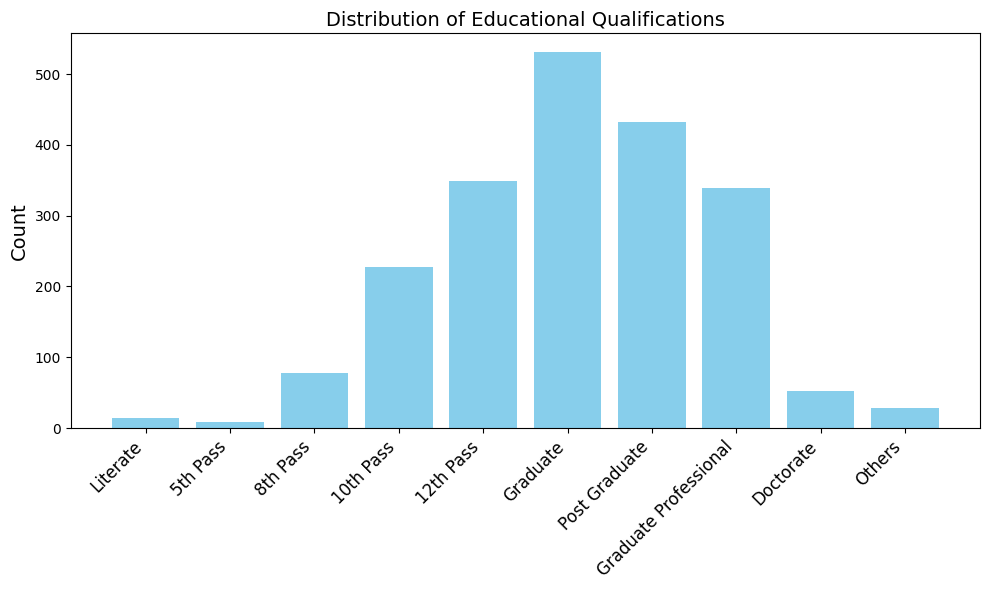

In [133]:
keys = education_order.keys()
counts = [label_counts[key] for key in keys]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(keys, counts, color='skyblue')
# plt.xlabel('Educational Qualification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Educational Qualifications', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

In [134]:
len(df)

2059

In [135]:
for column in df.columns :
    print(f"Unique entries in the column {column} are {len(set(df[column]))}")

Unique entries in the column ID are 2059
Unique entries in the column Candidate are 2039
Unique entries in the column Constituency ∇ are 2037
Unique entries in the column Party are 23
Unique entries in the column Criminal Case are 35
Unique entries in the column Total Assets are 210
Unique entries in the column Liabilities are 170
Unique entries in the column state are 28
Unique entries in the column Education are 10


In [136]:
from utils import transform_assets

df['Total Assets'] = df['Total Assets'].apply(transform_assets)
df['Liabilities'] = df['Liabilities'].apply(transform_assets)

In [137]:
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [138]:
df.isna().sum()

ID                0
Candidate         0
Constituency ∇    0
Party             0
Criminal Case     0
Total Assets      0
Liabilities       0
state             0
Education         0
dtype: int64

In [139]:
df['Wealth'] = df['Total Assets'] - df['Liabilities']

In [140]:
import matplotlib.pyplot as plt

df_filtered = df[df.groupby('Party')['Criminal Case'].transform('sum') > 0]

# Calculate the percentage distribution of parties with candidates having the most criminal records
criminal_max_percent = (df_filtered.groupby('Party')['Criminal Case'].mean() / df_filtered.groupby('Party')['Criminal Case'].sum().sum()) * 100

df_filtered = df[df.groupby('Party')['Total Assets'].transform('sum') > 0]
# Calculate the percentage distribution of parties with the most wealthy candidates
wealthy_max_percent = (df_filtered.groupby('Party')['Wealth'].mean() / df_filtered.groupby('Party')['Wealth'].sum().sum()) * 100




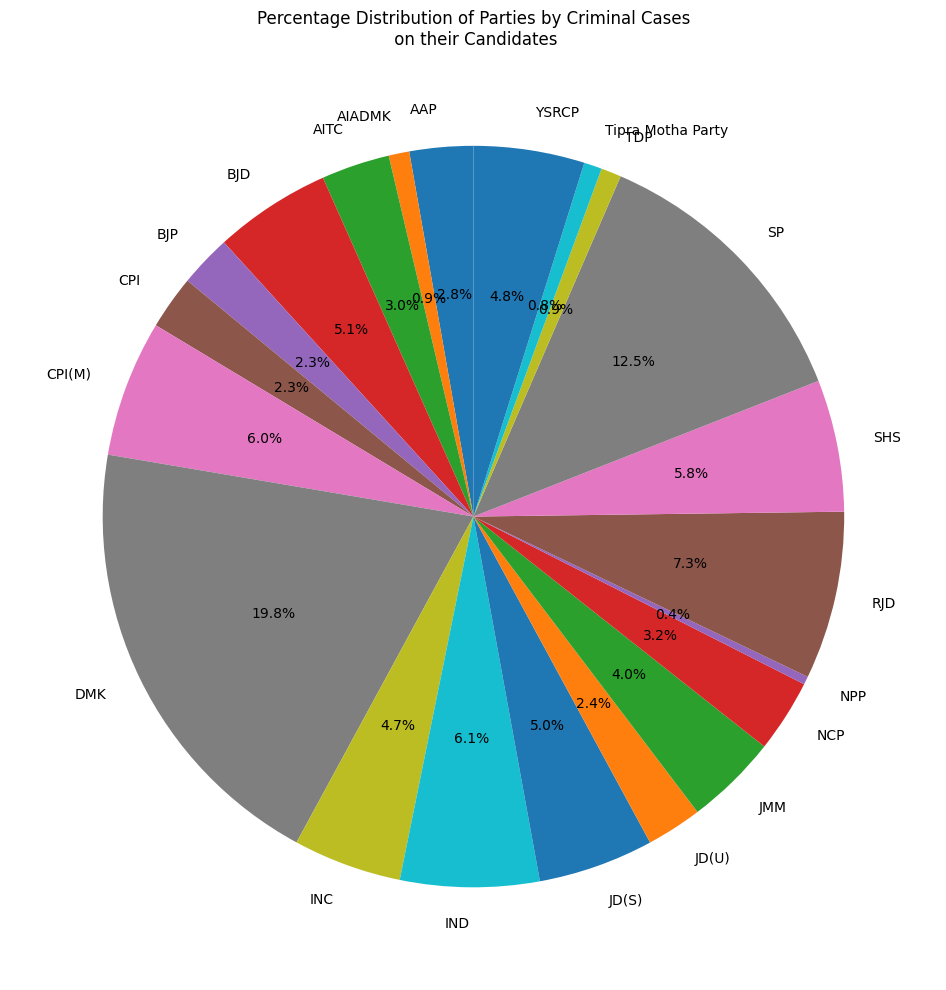

In [141]:
# Plotting
plt.figure(figsize=(15, 10))
# Plot for criminal cases
plt.pie(criminal_max_percent, labels=criminal_max_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Parties by Criminal Cases\n on their Candidates')

plt.tight_layout()
plt.show()

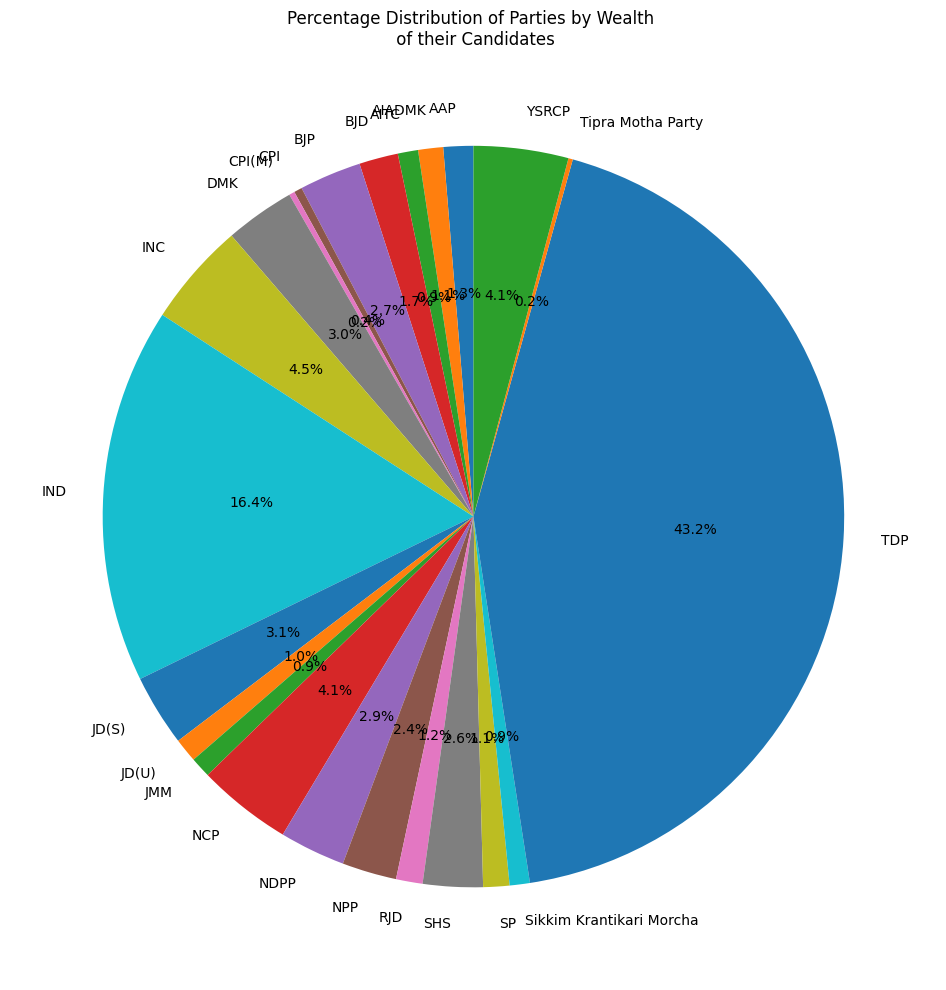

In [142]:
# Plot for total assets

plt.figure(figsize=(15,10))
plt.pie(wealthy_max_percent, labels=wealthy_max_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Parties by Wealth \n of their Candidates')

plt.tight_layout()
plt.show()


In [143]:
from utils import encode_categorical_data

In [144]:
df['Education']

0                    8th Pass
1                   12th Pass
2               Post Graduate
3               Post Graduate
4                    8th Pass
                ...          
2054    Graduate Professional
2055                10th Pass
2056                 Graduate
2057                12th Pass
2058                 Graduate
Name: Education, Length: 2059, dtype: object

In [145]:
df['Education'] = encode_categorical_data(df['Education'])

In [146]:
encode_categorical_data(['Graduate'])

[5]

In [147]:
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Wealth
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,2,2090000000
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,4,10000000
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,6,67800000
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,6,87600000
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,2,13900000


In [148]:
df.drop('Wealth', axis = 1, inplace=True)

In [149]:
df.corr()

C:\Users\arush\AppData\Local\Temp\ipykernel_9372\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Criminal Case,Total Assets,Liabilities,Education
ID,1.000000,0.034991,0.006593,-0.001341,-0.005458
Criminal Case,0.034991,1.000000,-0.012985,-0.000981,-0.005476
Total Assets,0.006593,-0.012985,1.000000,0.597508,-0.018970
Liabilities,-0.001341,-0.000981,0.597508,1.000000,-0.005086
Education,-0.005458,-0.005476,-0.018970,-0.005086,1.000000


In [150]:
numerical_df = df[['Total Assets', 'Criminal Case', 'Liabilities', 'Education']]

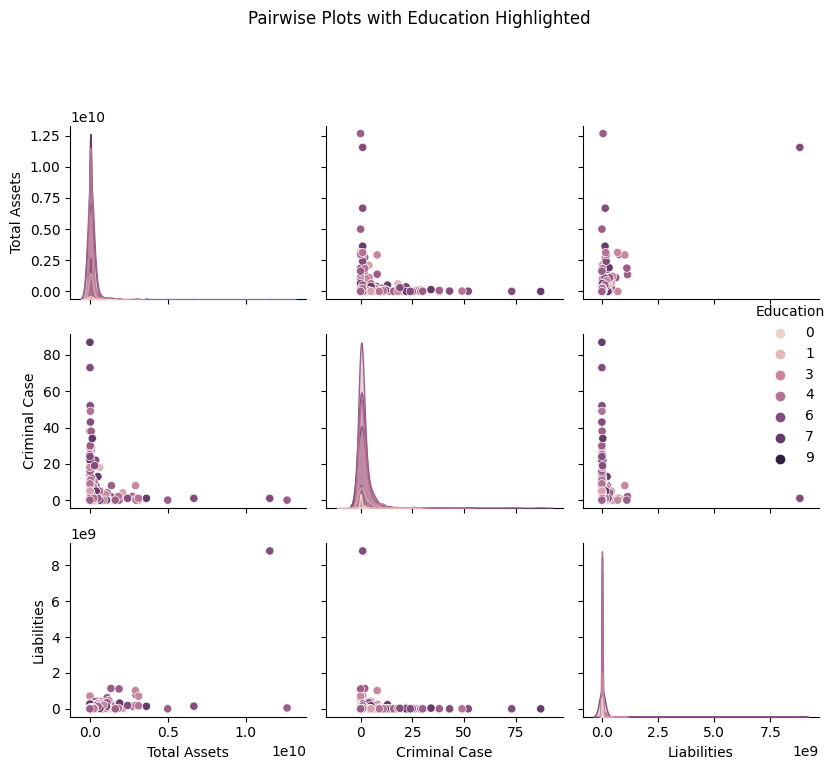

In [151]:
import seaborn as sns
pairplot = sns.pairplot(numerical_df, hue='Education')
pairplot.fig.suptitle('Pairwise Plots with Education Highlighted', y=1.02)
pairplot.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplot layout
plt.show()

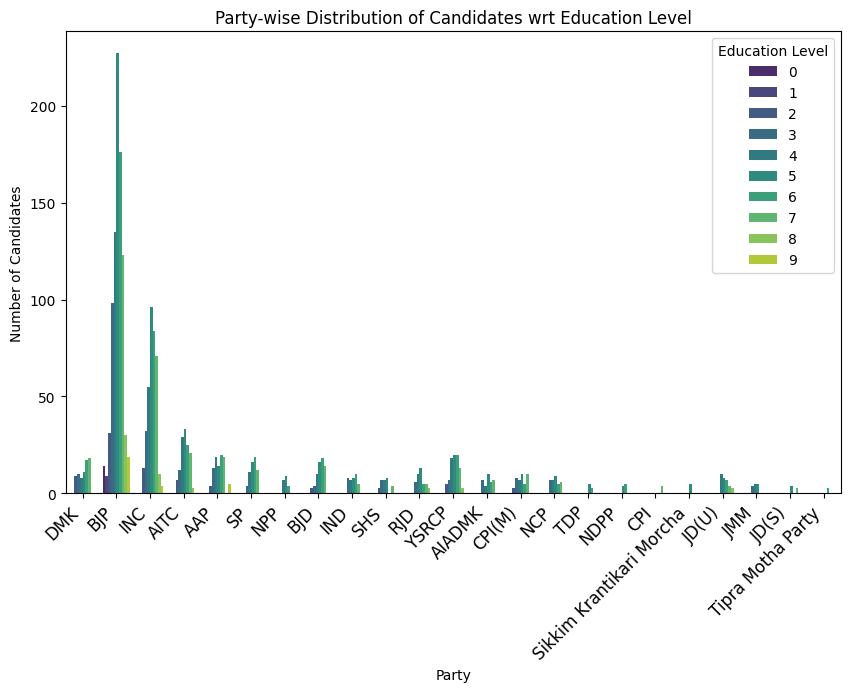

In [152]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Party', hue='Education', data=df, palette='viridis')
plt.title('Party-wise Distribution of Candidates wrt Education Level')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.legend(title='Education Level')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()

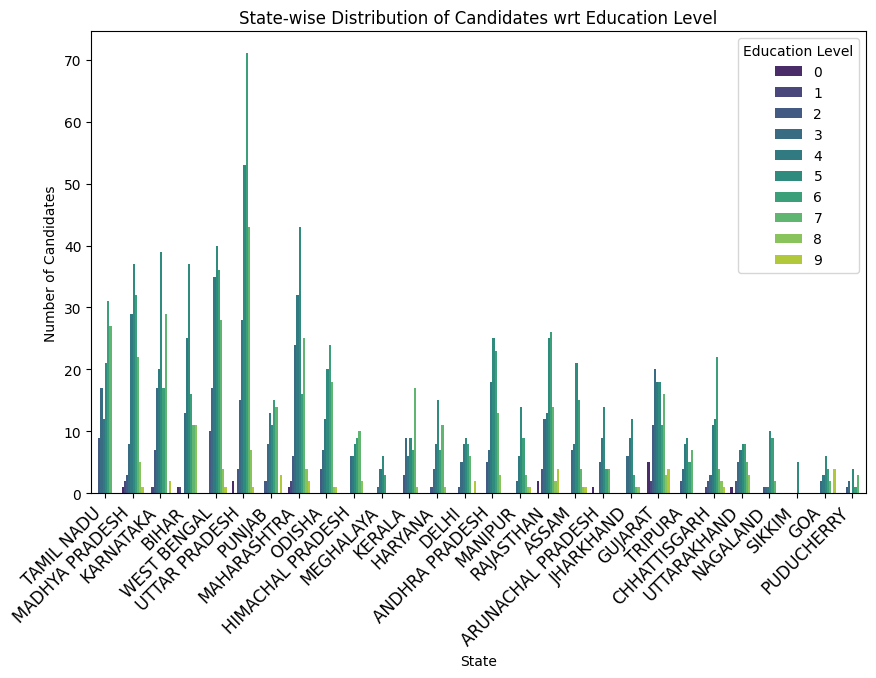

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='Education', data=df, palette='viridis')
plt.title('State-wise Distribution of Candidates wrt Education Level')
plt.xlabel('State')
plt.ylabel('Number of Candidates')
plt.legend(title='Education Level')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()